<a href="https://colab.research.google.com/github/Charles130-Anderson/alx-higher_level_programming/blob/main/AFS_Sentimental_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                           postTitle  postDescription  \
0  Learn Data Science  and Join Our Community of ...              NaN   
1  Learn Data Science  and Join Our Community of ...              NaN   
2  Learn Data Science  and Join Our Community of ...              NaN   
3  Learn Data Science  and Join Our Community of ...              NaN   
4  Learn Data Science  and Join Our Community of ...              NaN   

                                  text  likesCount  \
0                       I'm interested           0   
1        Am interested hw will I learn           0   
2                      The touch kaili           0   
3  Hello I need to learn data science.           0   
4                       I'm interested           0   

                                         facebookUrl  
0  https://www.facebook.com/100063641216614/posts...  
1  https://www.facebook.com/100063641216614/posts...  
2  https://www.facebook.com/100063641216614/posts...  
3  https://www.f

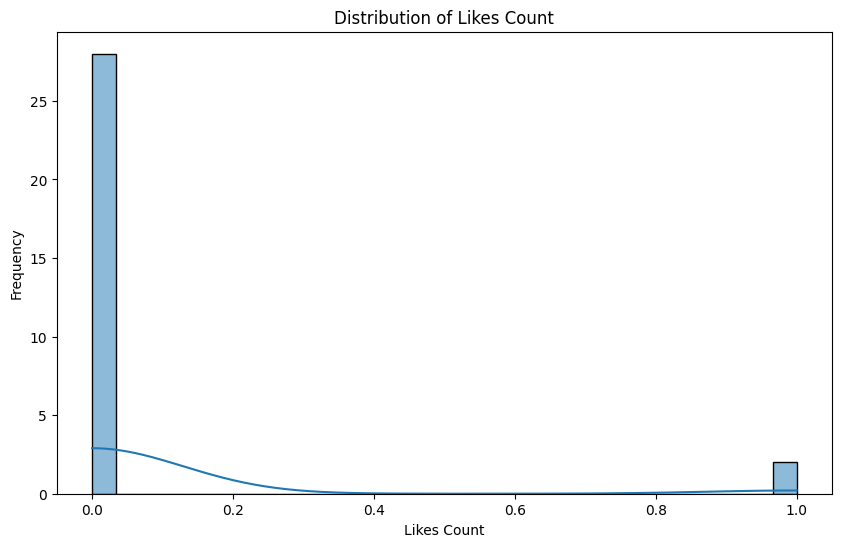

In [ ]:
import pandas as pd
from tqdm.auto import tqdm

# Load the CSV file into a DataFrame
file_path = '/Africa Data School Sentiments.csv'
df = pd.read_csv(file_path)

# Display the head of the DataFrame
df_head = df.head()
print(df_head)
print(df.describe())

# Plotting distributions
import matplotlib.pyplot as plt
import seaborn as sns

# Likes Count Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['likesCount'], bins=30, kde=True)
plt.title('Distribution of Likes Count')
plt.xlabel('Likes Count')
plt.ylabel('Frequency')
plt.show()




100%|██████████| 30/30 [00:00<00:00, 1765.28it/s]


                                           postTitle  postDescription  \
0  Learn Data Science  and Join Our Community of ...              NaN   
1  Learn Data Science  and Join Our Community of ...              NaN   
2  Learn Data Science  and Join Our Community of ...              NaN   
3  Learn Data Science  and Join Our Community of ...              NaN   
4  Learn Data Science  and Join Our Community of ...              NaN   

                                  text  likesCount  \
0                       I'm interested           0   
1        Am interested hw will I learn           0   
2                      The touch kaili           0   
3  Hello I need to learn data science.           0   
4                       I'm interested           0   

                                         facebookUrl  sentiment  
0  https://www.facebook.com/100063641216614/posts...       0.25  
1  https://www.facebook.com/100063641216614/posts...       0.25  
2  https://www.facebook.com/1000636412

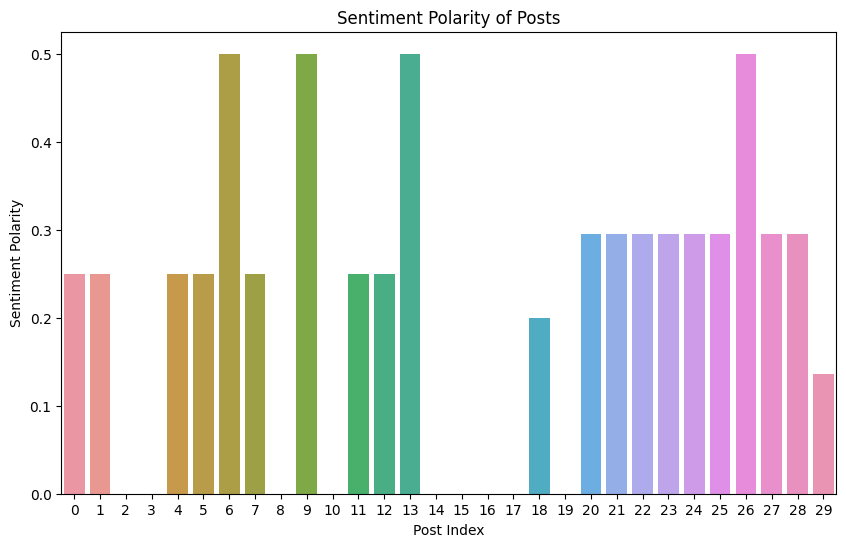

In [ ]:
import os
import pandas as pd
from textblob import TextBlob
import tqdm
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# Get the absolute path of the CSV file
file_path = os.path.abspath('/Africa Data School Sentiments.csv')

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path, encoding='UTF-8-SIG')

# Adding a new column for sentiment polarity
from tqdm import tqdm
tqdm.pandas()
df['sentiment'] = df['text'].progress_apply(lambda x: TextBlob(x).sentiment.polarity)

# Display the head of the DataFrame to show the new 'sentiment' column
print(df.head())

# Plotting the sentiment polarity as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=df.index, y='sentiment', data=df)
plt.title('Sentiment Polarity of Posts')
plt.xlabel('Post Index')
plt.ylabel('Sentiment Polarity')
plt.show()


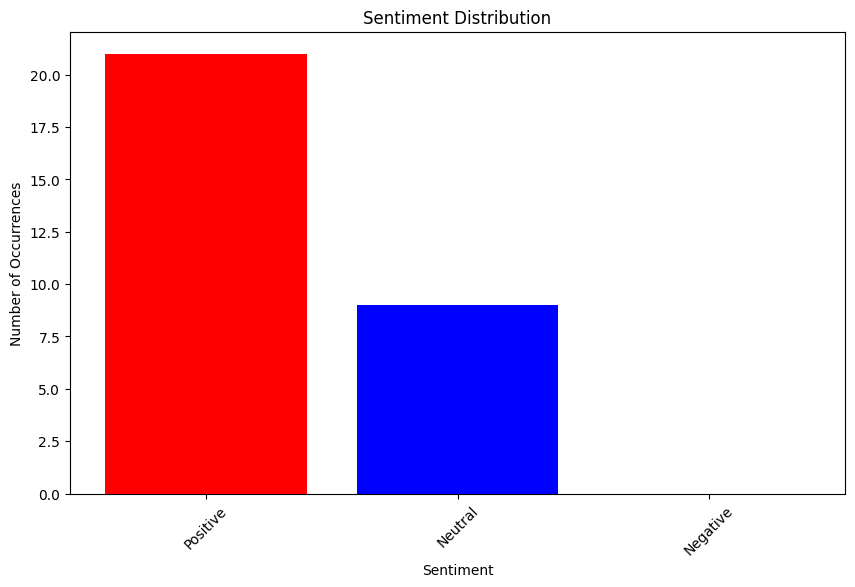

Positive    21
Neutral      9
Negative     0
Name: sentiment_category, dtype: int64


In [ ]:
# Count the number of occurrences of each sentiment
df['sentiment_category'] = pd.cut(df['sentiment'],
                                  bins=[-1, -0.01, 0.01, 1],
                                  labels=['Negative', 'Neutral', 'Positive'],
                                  include_lowest=True)

sentiment_counts = df['sentiment_category'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['red', 'blue', 'green'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()

# Print the counts for each sentiment category
print(sentiment_counts)

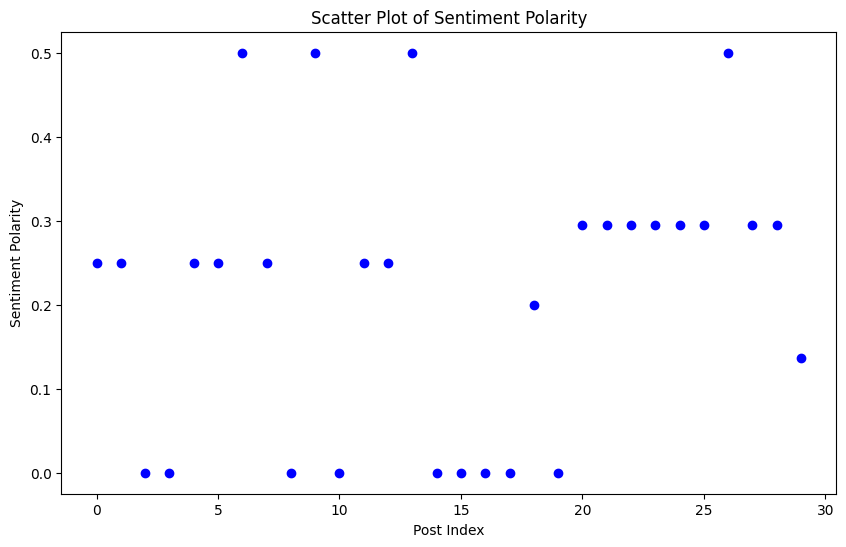

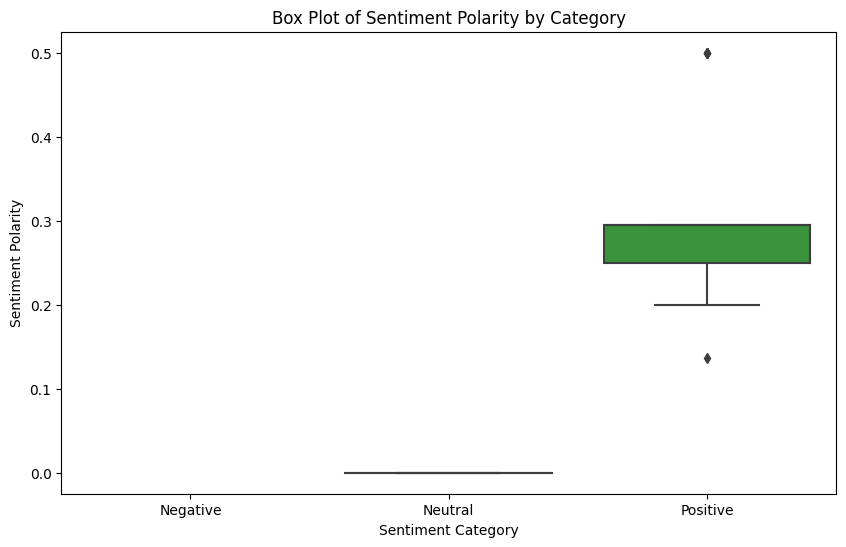

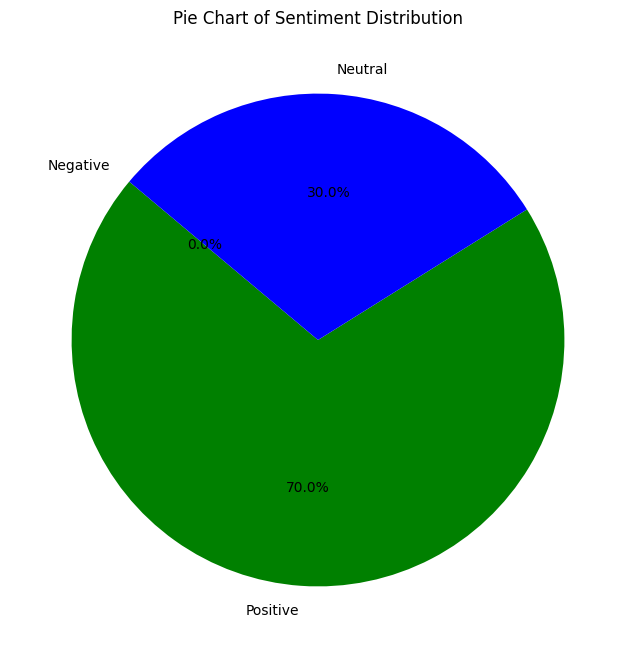

In [ ]:
# Generate a scatter plot, box plot, and pie chart for the sentiment data

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['sentiment'], color='blue')
plt.title('Scatter Plot of Sentiment Polarity')
plt.xlabel('Post Index')
plt.ylabel('Sentiment Polarity')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment_category', y='sentiment', data=df)
plt.title('Box Plot of Sentiment Polarity by Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Sentiment Polarity')
plt.show()

# Pie Chart
sentiment_counts = df['sentiment_category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'blue', 'red'])
plt.title('Pie Chart of Sentiment Distribution')
plt.show()

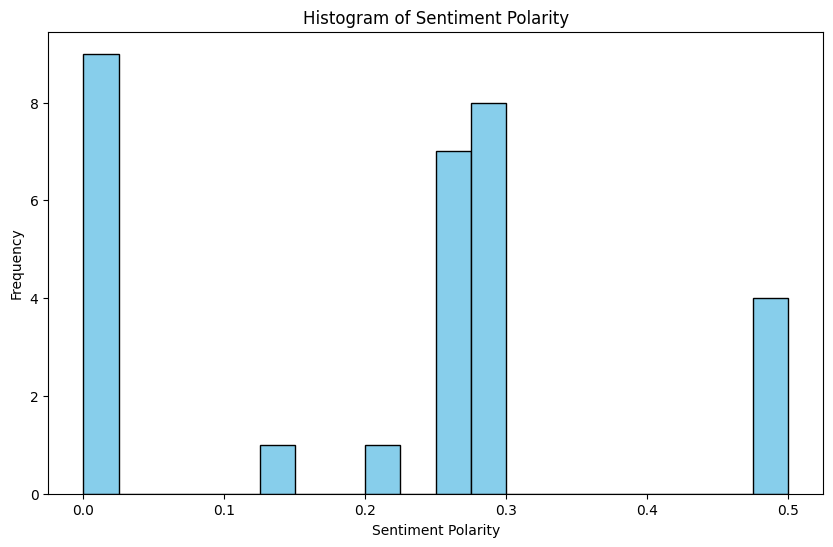

<ipython-input-69-487469595ef4>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['sentiment'], shade=True, color='blue')


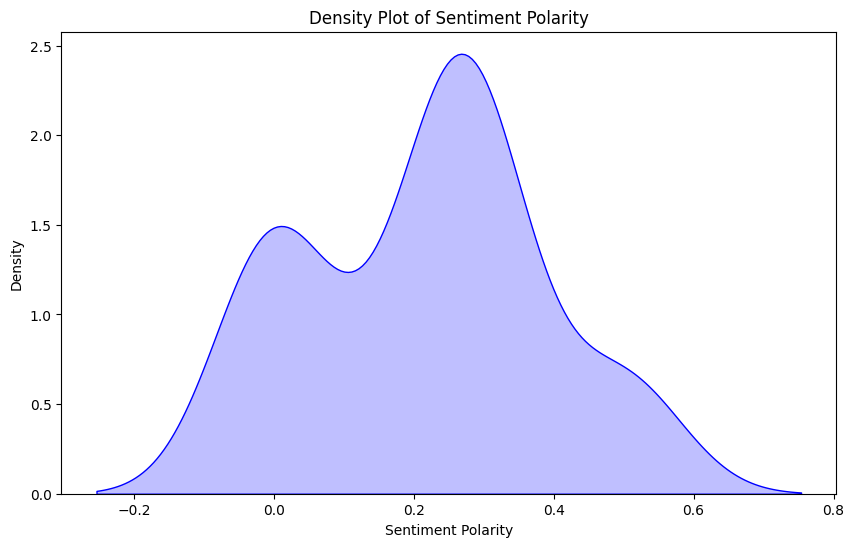

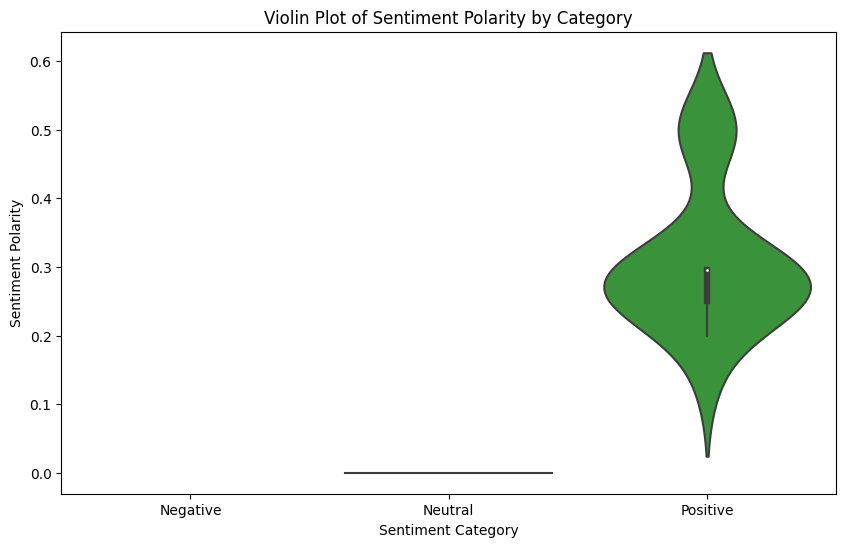

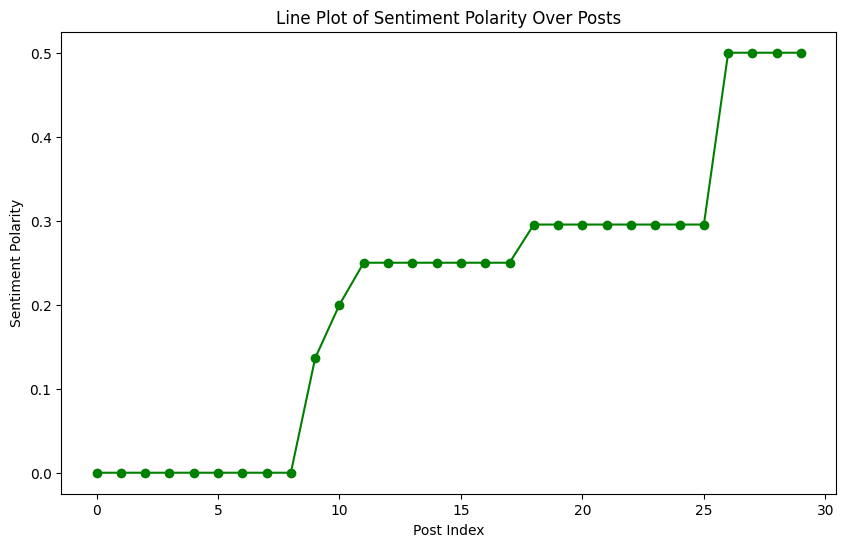

In [ ]:
import numpy as np

# Generate a histogram for sentiment polarity
plt.figure(figsize=(10, 6))
plt.hist(df['sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Generate a density plot for sentiment polarity
plt.figure(figsize=(10, 6))
sns.kdeplot(df['sentiment'], shade=True, color='blue')
plt.title('Density Plot of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.show()

# Generate a violin plot for sentiment polarity by category
plt.figure(figsize=(10, 6))
sns.violinplot(x='sentiment_category', y='sentiment', data=df)
plt.title('Violin Plot of Sentiment Polarity by Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Sentiment Polarity')
plt.show()

# Generate a line plot for sentiment polarity over the index
# Assuming the index represents a chronological order
plt.figure(figsize=(10, 6))
plt.plot(df.index, np.sort(df['sentiment']), marker='o', linestyle='-', color='green')
plt.title('Line Plot of Sentiment Polarity Over Posts')
plt.xlabel('Post Index')
plt.ylabel('Sentiment Polarity')
plt.show()

In [ ]:
# Calculate measures of central tendency and dispersion for the sentiment column

# Measures of central tendency
mean_sentiment = df['sentiment'].mean()
median_sentiment = df['sentiment'].median()
mode_sentiment = df['sentiment'].mode()[0]  # mode returns a Series

# Measures of dispersion
std_dev_sentiment = df['sentiment'].std()
variance_sentiment = df['sentiment'].var()
range_sentiment = df['sentiment'].max() - df['sentiment'].min()

# Create a summary table
summary_table = pd.DataFrame({
    'Measure': ['Mean', 'Median', 'Mode', 'Standard Deviation', 'Variance', 'Range'],
    'Value': [mean_sentiment, median_sentiment, mode_sentiment, std_dev_sentiment, variance_sentiment, range_sentiment]
})

# Display the summary table
print(summary_table)

              Measure     Value
0                Mean  0.215000
1              Median  0.250000
2                Mode  0.000000
3  Standard Deviation  0.166888
4            Variance  0.027851
5               Range  0.500000
